# TYCS - C1 - SD Project 2 - Analysis & Predictions on Occurrences of Strokes - A Case Study on Medical Records

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

   ###### Aditi Goyal - PRN: 18070122003
   ###### Aditya Banerjee - PRN: 18070122004
   ###### Aditya Kumar - PRN: 18070122005
   ###### Aniket Mulik - PRN: 18070122008

### Loading Libraries and Dataset

In [168]:
library(corrplot)
library(dplyr)
library(bestglm)
library(ROCR)

In [169]:
dataset = read.csv('healthcare-dataset-stroke-data.csv')
head(dataset,10)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NA,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59,0,0,Yes,Private,Rural,76.15,NA,Unknown,1
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Dataset Analysis and Preprocessing

In [170]:
summary(dataset)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

In [171]:
colnames(dataset)[apply(dataset,2,anyNA)]
dataset$bmi[is.na(dataset$bmi)]<-mean(dataset$bmi, na.rm = TRUE)
colnames(dataset)[apply(dataset,2,anyNA)]
summary(dataset)

[1] "bmi"

character(0)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
 avg_glucose_level      bmi                smoking_status     stroke 

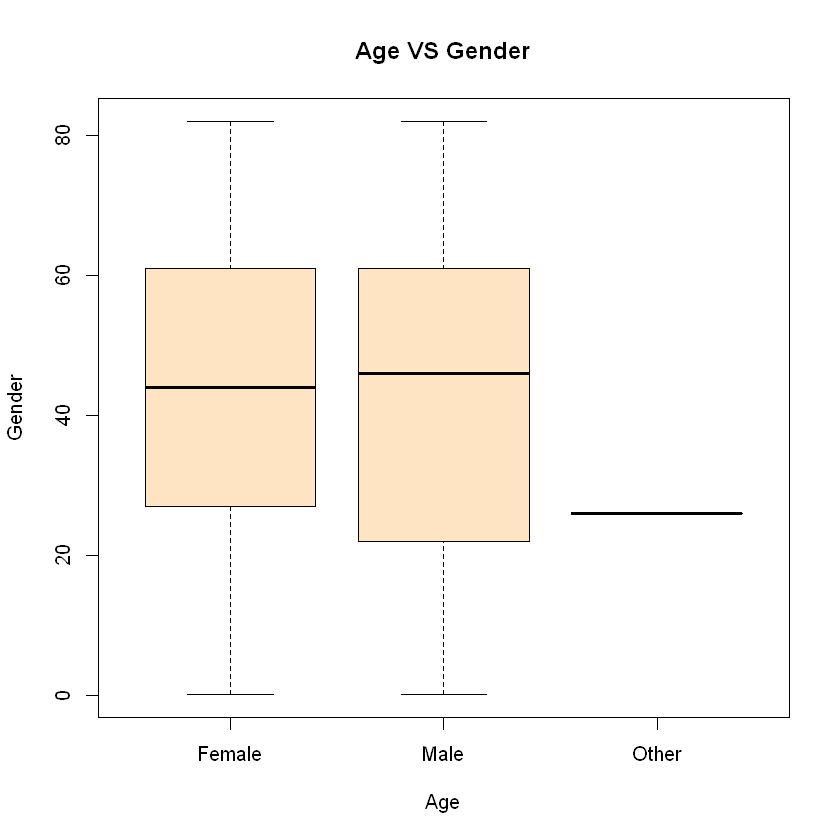

In [172]:
boxplot(age ~ gender, data = dataset, xlab = "Age",ylab = "Gender", main = "Age VS Gender",col='bisque')

In [173]:
columns = colnames(dataset)
columns

[1] "id"                "gender"            "age"              
 [4] "hypertension"      "heart_disease"     "ever_married"     
 [7] "work_type"         "Residence_type"    "avg_glucose_level"
[10] "bmi"               "smoking_status"    "stroke"

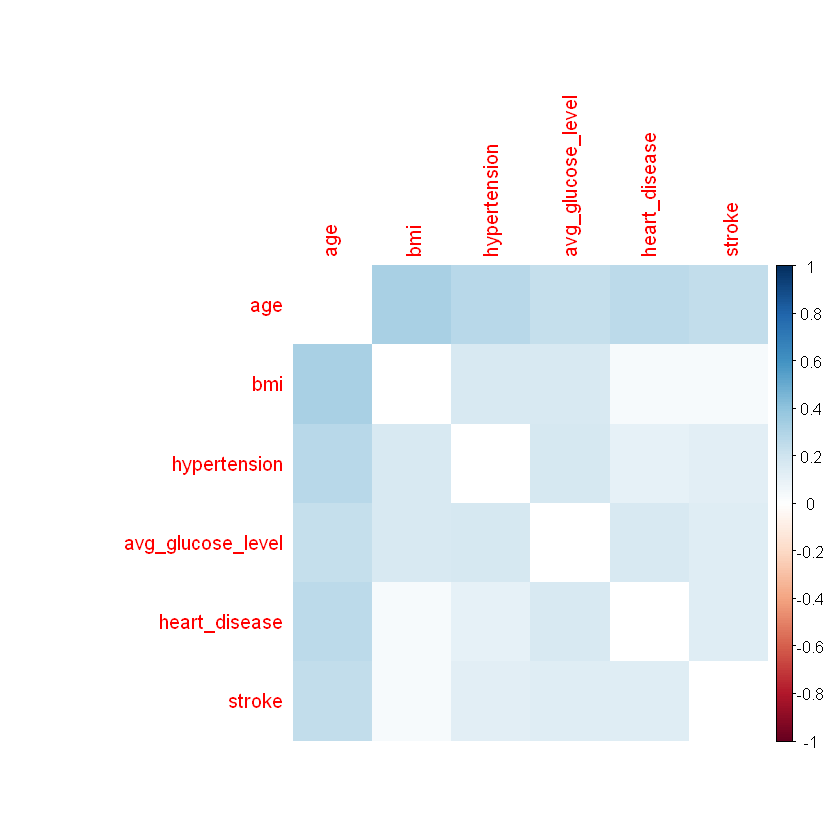

In [174]:
dataset1<-dataset %>% select(columns)
dataset1<-subset(dataset1, select = c(age,hypertension,heart_disease,avg_glucose_level,bmi,stroke))
new_data<-as.matrix(dataset1)
corrplot(cor(new_data),method="shade",order="hclust", diag=FALSE)

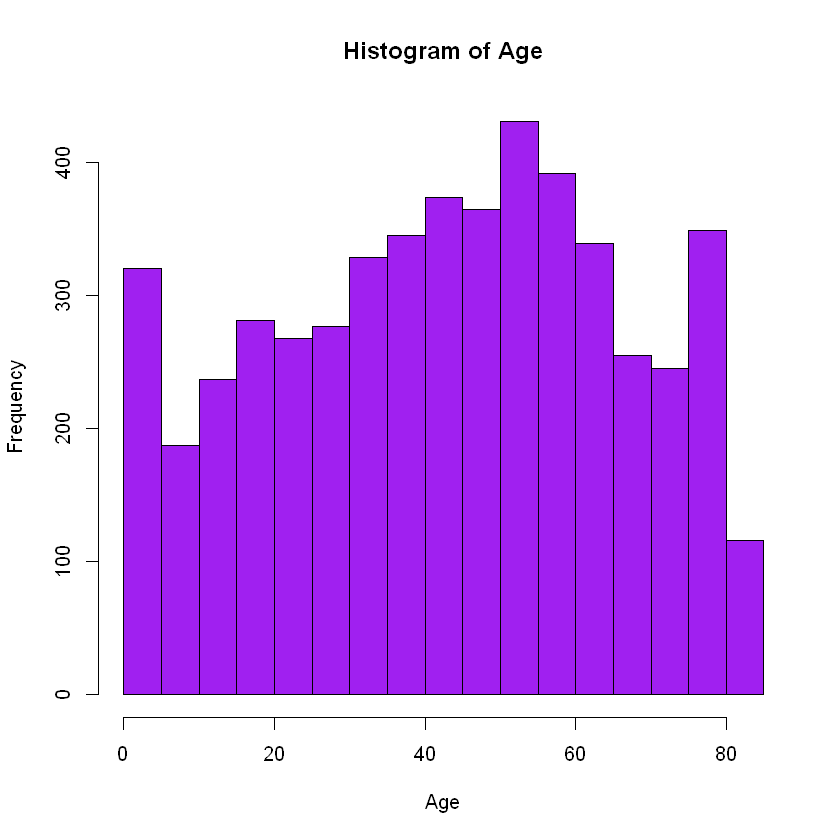

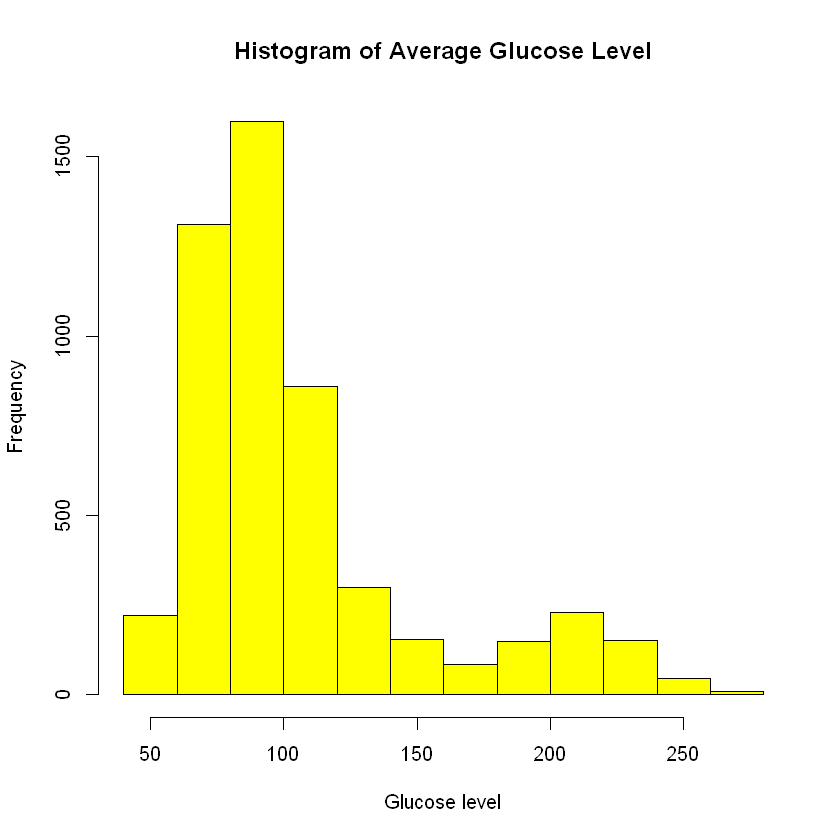

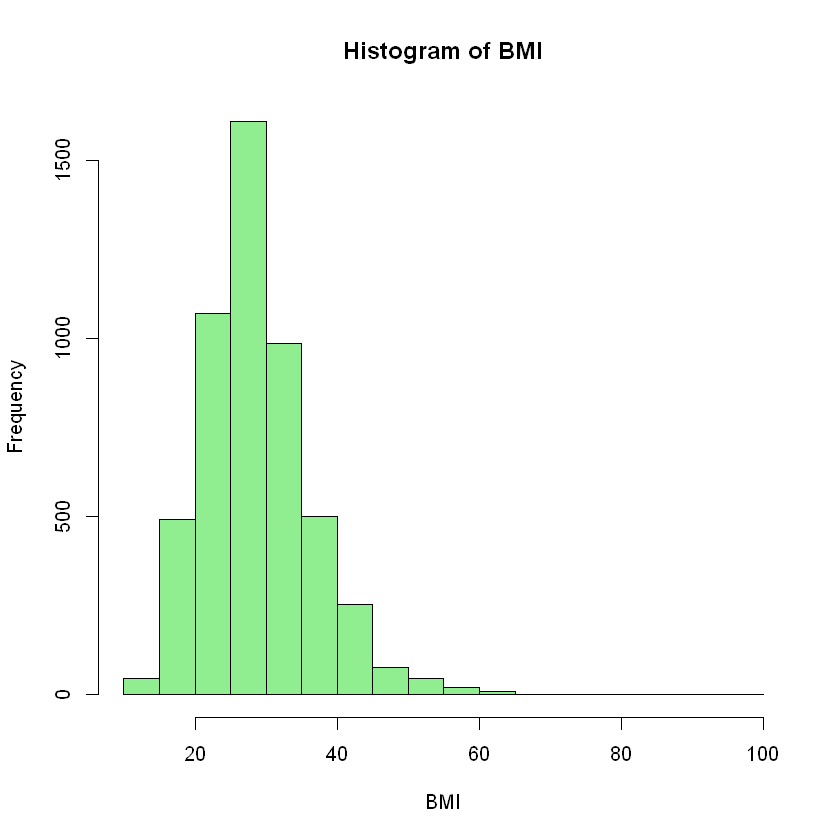

In [175]:
hist(dataset$age,xlab = 'Age',col="purple",main="Histogram of Age")
hist(dataset$avg_glucose_level,xlab = 'Glucose level',col="yellow",main="Histogram of Average Glucose Level")
hist(dataset$bmi,xlab = 'BMI', col="lightgreen",main="Histogram of BMI")

In [176]:
dataset[dataset$gender=='Other', ] <- NA
dataset <- na.omit(dataset)

data_scaled <- dataset
data_scaled$avg_glucose_level <- scale(data_scaled$avg_glucose_level)
data_scaled$bmi <- scale(data_scaled$bmi)

In [177]:
N <- nrow(data_scaled)
train <- sample(1:N, size = 0.70*N)
val <- sample(setdiff(1:N, train), size = 0.15*N )
test <- setdiff(1:N, union(train, val))

moddata <- data_scaled[,1:11]

head(data_scaled)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,2.706185068,1.0009426867,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,2.121444031,-0.0001650951,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,-0.004866938,0.4683530822,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,1.437332349,0.7151628989,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,1.501150385,-0.6357960979,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,1.768126184,0.0137034198,formerly smoked,1


In [178]:
fitlog <- glm(stroke ~ ., data = data_scaled[train,],family = "binomial")
summary(fitlog)


Call:
glm(formula = stroke ~ ., family = "binomial", data = data_scaled[train, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1044  -0.3244  -0.1664  -0.0914   3.4789  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -5.900e+00  7.745e-01  -7.617 2.59e-14 ***
id                         -2.947e-06  3.821e-06  -0.771  0.44059    
genderMale                  1.051e-01  1.666e-01   0.631  0.52818    
age                         7.256e-02  6.972e-03  10.407  < 2e-16 ***
hypertension                1.085e-01  2.039e-01   0.532  0.59469    
heart_disease               4.259e-01  2.221e-01   1.917  0.05518 .  
ever_marriedYes             1.119e-01  2.788e-01   0.401  0.68814    
work_typeGovt_job          -1.610e+00  8.959e-01  -1.797  0.07235 .  
work_typeNever_worked      -1.062e+01  3.746e+02  -0.028  0.97738    
work_typePrivate           -1.300e+00  8.703e-01  -1.494  0.13525    
work_typeSelf

In [179]:
logodd <- predict(fitlog)
phat <- fitted(fitlog)

            Predicted_value
Actual_value FALSE TRUE
           0  3392    6
           1   172    6

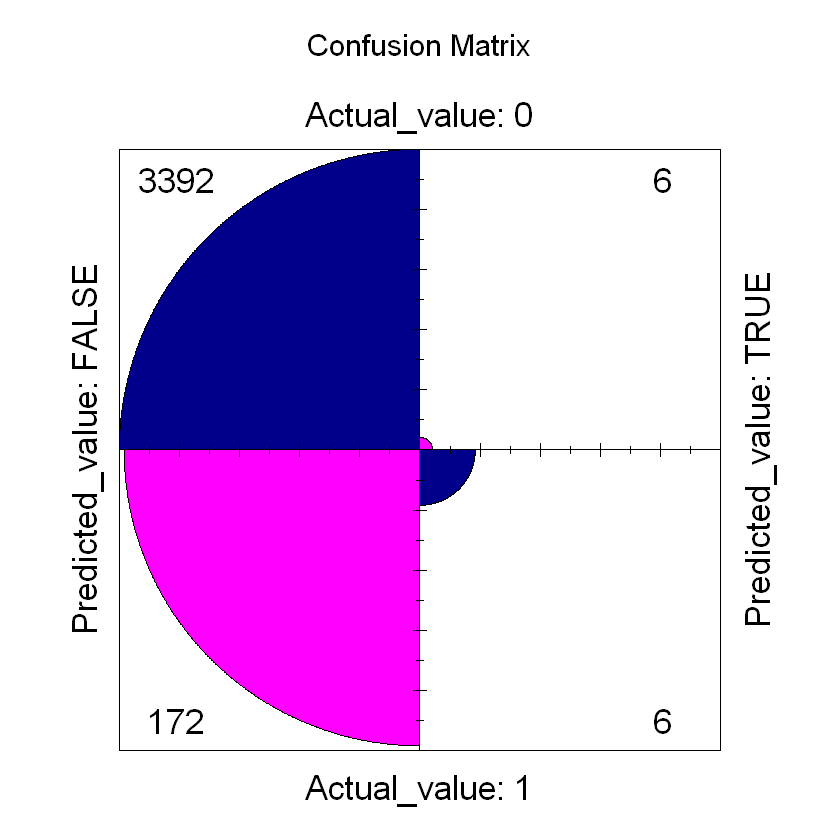

In [180]:
conf_matrix = table(Actual_value = data_scaled$stroke[train], Predicted_value = logodd>-0.5)
conf_matrix
fourfoldplot(conf_matrix, color = c("magenta", "darkblue"),conf.level = 0, margin = 1, main = "Confusion Matrix")

In [181]:
false_accuracy = 3409/(3409+167)
false_accuracy

[1] 0.9532998

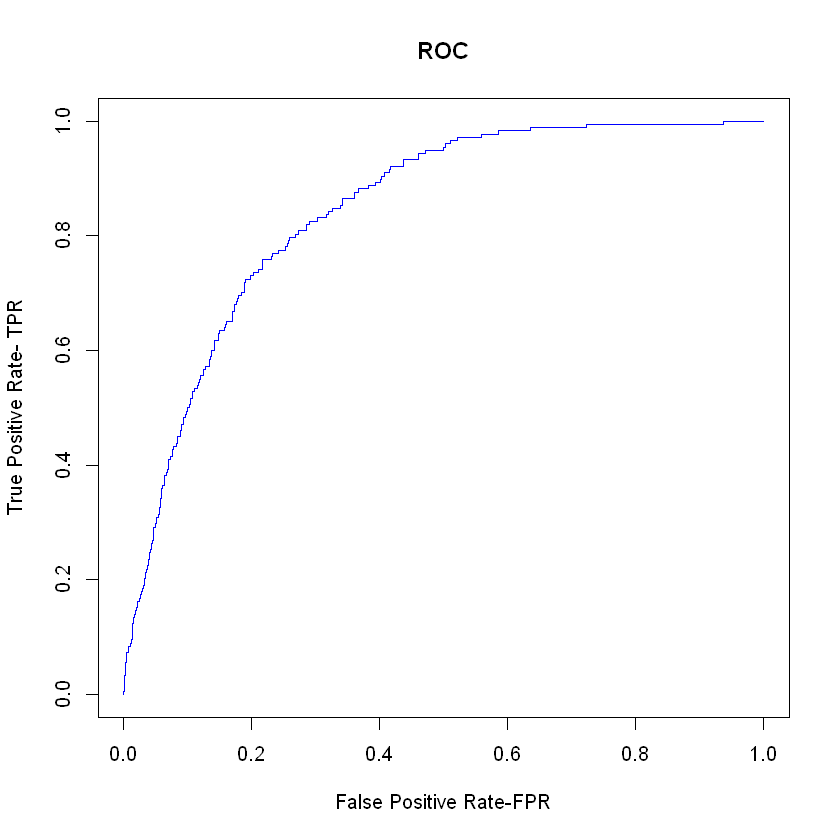

In [182]:
predObj <- prediction(fitted(fitlog),data_scaled$stroke[train])
pref <- performance(predObj,"tpr","fpr")
plot(pref,ylab="True Positive Rate- TPR",xlab="False Positive Rate-FPR", main="ROC", col='blue')

In [183]:
auc <- performance(predObj,"auc")
auc

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.8433332


Slot "alpha.values":
list()


### --------------------------------------------------------------------------------------------------------------------------------------------------------------